# Binary Tree Visualizer

In [2]:
class TreeNode:
    def __init__(self, data=0,  left=None, right=None):
        self.data = data
        self.left = left
        self.right = right
    
    def __repr__(self):
        return f"TreeNode(data: {self.data}, left: {self.left}, right: {self.right})"

In [3]:
# testing the TreeNode class
my_tree = TreeNode(data=5)
my_tree.left = TreeNode(data=10)
my_tree.right = TreeNode(data=15)
my_tree.left.left = TreeNode(data=20)
my_tree.right.left = TreeNode(data=25)

In [4]:
my_tree

TreeNode(data: 5, left: TreeNode(data: 10, left: TreeNode(data: 20, left: None, right: None), right: None), right: TreeNode(data: 15, left: TreeNode(data: 25, left: None, right: None), right: None))

In [5]:
# the graph visualizatoin
from graphviz import Graph

def put_in_tree(tree, node):
    tree.node(name=str(id(node)), label="%d" %(node.data), shape='circle')
    return tree

def connect_with_parent(tree, parent, child):
    tree.edge(str(id(parent)), str(id(child)))
    return tree

# to obtain all the nodes
def bfs(root: TreeNode):
    if root is None:
        return
    dot = Graph(format='svg')
    
    node_queue = []
    node_queue.append(root)
    dot.node(name=str(id(root)), label="%d" %(root.data), shape='circle')
    
    while node_queue != []:
        parent = node_queue.pop(0)
        
        if parent.left:
            dot = put_in_tree(dot, parent.left)
            dot = connect_with_parent(dot, parent, parent.left)
            node_queue.append(parent.left)
        
        if parent.right:
            dot = put_in_tree(dot, parent.right)
            dot = connect_with_parent(dot, parent, parent.right)
            node_queue.append(parent.right)
            
    
    return dot

In [6]:
dot = bfs(my_tree)

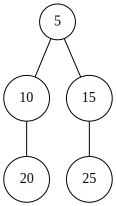

In [7]:
dot

In [76]:
class BinaryTree(TreeNode):
    def __init__(self, root: TreeNode=None):
        self.root = root
    
    def __repr__(self):
        return f"BinaryTree(data: {self.root.data}, left: {self.root.left}, right: {self.root.right})"

    def insert(self, data=None, node=None):
        if data is None and node is None:
            return None, None
        
        dot_before = Graph(format='svg')
        
        if self.root is None:
            if data is not None:
                self.root = TreeNode(data)
            else:
                self.root = node
            
            dot_after = dot_before.copy()
            dot_after = put_in_tree(self.root)
            
            return dot_before, dot_after
        
        node_queue = []
        node_queue.append(self.root)
        dot_before = put_in_tree(dot_before, self.root)
        
        while node_queue != []:
            parent = node_queue.pop(0)
            
            if parent.left:
                dot_before = put_in_tree(dot_before, parent.left)
                dot_before = connect_with_parent(dot_before, parent, parent.left)
                node_queue.append(parent.left)
            else:
                dot_after = dot_before.copy()
                if data is not None:
                    parent.left = TreeNode(data)
                else:
                    parent.left = node
                
                dot_after = put_in_tree(dot_after, parent.left)
                dot_after = connect_with_parent(dot_after, parent, parent.left)
                break

            if parent.right:
                dot_before = put_in_tree(dot_before, parent.right)
                dot_before = connect_with_parent(dot_before, parent, parent.right)
                node_queue.append(parent.right)
            else:
                dot_after = dot_before.copy()
                if data is not None:
                    parent.right = TreeNode(data)
                else:
                    parent.right = node
                
                dot_after = put_in_tree(dot_after, parent.right)
                dot_after = connect_with_parent(dot_after, parent, parent.right)
                break
        
        return dot_before, dot_after
    
    def search(self, target=None):
        if target is None:
            return None
        def search_recursive(root, target):
            if root is None:
                return None

            if root.data == target:
                return root
            if root.left:
                if root.left.data == target:
                    return root.left
            if root.right:
                if root.right.data == target:
                    return root.right

            return search_recursive(root.left, target) or search_recursive(root.right, target)
        
        return search_recursive(self.root, target)
    
    def delete(self, data=None):
        if data is None:
            return None, None
        
        dot_before = self.bfs()        
        def find_target_parent(root, target):
            if not root:
                return None
            if root.data == target:
                return None, root
            if root.left:
                if root.left.data == target:
                    return root, root.left
            if root.right:
                if root.right.data == target:
                    return root, root.right
            
            return find_target_parent(root.left, target) or find_target_parent(root.right, target)
        
        def delete_target(root, target):
            if root is None:
                return
            
            # find in the left child
            parent, child = find_target_parent(root, target)
            
            if parent is None:
                if child.left:
                    parent = child
                    child = child.left
                    parent.data, child.data = child.data, parent.data
                
                elif child.right:
                    parent = child
                    child = child.right
                    parent.right, child.right = child.right, parent.right
                
                else:
                    self.root = None
                    return
                
            if parent.left == child:
                temp = child
                if temp.left is None:
                    parent.left = child.right
                    return
                    
                while temp.left:
                    temp = temp.left
                    child.data, temp.data = temp.data, child.data
                    parent = parent.left
                    child = child.left
                parent.left = None

            elif parent.right == child:
                temp = child
                if temp.right is None:
                    parent.right = child.left
                    return
                    
                while temp.right:
                    temp = temp.right
                    child.data, temp.data = temp.data, child.data
                    child = child.right
                    parent = parent.right
                parent.right = None

        delete_target(self.root, data)
        dot_after = self.bfs()
        
        return dot_before, dot_after
    
    def bfs(self):
        if self.root is None:
            return
        dot = Graph(format='svg')

        node_queue = []
        node_queue.append(self.root)
        dot.node(name=str(id(self.root)), label="%d" %(self.root.data), shape='circle')

        while node_queue != []:
            parent = node_queue.pop(0)

            if parent.left:
                dot = put_in_tree(dot, parent.left)
                dot = connect_with_parent(dot, parent, parent.left)
                node_queue.append(parent.left)

            if parent.right:
                dot = put_in_tree(dot, parent.right)
                dot = connect_with_parent(dot, parent, parent.right)
                node_queue.append(parent.right)


        return dot

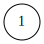

In [77]:
my_tree = BinaryTree(TreeNode(1))
my_tree.bfs()

In [78]:
# testing insert
for i in range(1, 6):
    b, a = my_tree.insert(data=i)

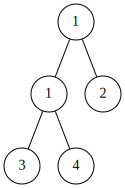

In [79]:
b

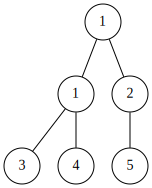

In [80]:
a

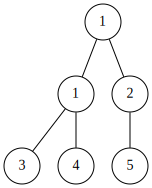

In [81]:
my_tree.bfs()

In [82]:
my_tree

BinaryTree(data: 1, left: TreeNode(data: 1, left: TreeNode(data: 3, left: None, right: None), right: TreeNode(data: 4, left: None, right: None)), right: TreeNode(data: 2, left: TreeNode(data: 5, left: None, right: None), right: None))

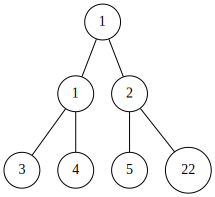

In [83]:
my_tree.insert(data=22)[1]

In [84]:
my_tree.delete(2)

(<graphviz.graphs.Graph at 0x7f40921f28e0>,
 <graphviz.graphs.Graph at 0x7f40921f2b20>)

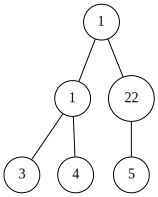

In [85]:
my_tree.bfs()

In [86]:
b, a = my_tree.delete(22)

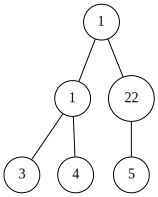

In [87]:
b

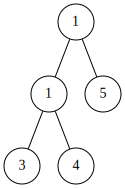

In [88]:
a

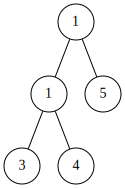

In [89]:
my_tree.bfs()

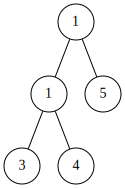

In [90]:
my_tree.bfs()

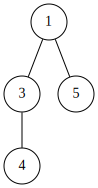

In [91]:
my_tree.delete(1)[1]

TreeNode(data: 1, left: TreeNode(data: 3, left: None, right: TreeNode(data: 4, left: None, right: None)), right: TreeNode(data: 5, left: None, right: None))